In [23]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
from math import ceil,sin,cos, atan2, pi, sqrt
import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions23 import *

In [24]:
path_bat = '/home/jvalenti/MOAD/grid/bathymetry_202108.nc'
bat = xr.open_dataset(path_bat,decode_times=False).Bathymetry

In [25]:
path_d='/results2/SalishSea/nowcast-green.202111/30oct22/SalishSea_1h_20221030_20221030_grid_T.nc'
path_d2='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_T.nc'
path_area='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_T.nc'
path_w='/results2/SalishSea/nowcast-green.202111/30oct22/SalishSea_1h_20221030_20221030_grid_W.nc'
path_w2='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_W.nc'
path_u='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_U.nc'
path_v='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_V.nc'

path_mask = '/ocean/jvalenti/MOAD/grid2/mesh_mask202108_TD.nc'
e3t = xr.open_dataset(path_d,decode_times=False).e3t
e3t2 = xr.open_dataset(path_d2,decode_times=False).e3t
e3t = xr.concat([e3t,e3t2],dim='time_counter')
Area = xr.open_dataset(path_area,decode_times=False).area
mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy
zz_ww = xr.open_dataset(path_mask,decode_times=False).gdepw_0
e3t0 = xr.open_dataset(path_mask,decode_times=False).e3t_0

In [26]:
ssh = xr.open_dataset(path_d,decode_times=False).sossheig[:,300,297:302]
ssh2 = xr.open_dataset(path_d2,decode_times=False).sossheig[:,300,297:302]
ssh = xr.concat([ssh,ssh2],dim='time_counter')
mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy[0,300,297:302]
u = xr.open_dataset(path_u,decode_times=False).vozocrtx[:,:,300,297:302]
w = xr.open_dataset(path_w,decode_times=False).vovecrtz[:,:,300,297:302]
w2 = xr.open_dataset(path_w2,decode_times=False).vovecrtz[:,:,300,297:302]
w = xr.concat([w,w2],dim='time_counter')
depthw = xr.open_dataset(path_w,decode_times=False).depthw
depthu = xr.open_dataset(path_u,decode_times=False).depthu
totaldepth = zz_ww[0, mbathy,300, 297:302]

In [27]:
# ssh = xr.open_dataset(path_d,decode_times=False).sossheig[:,445,302:307]
# ssh2 = xr.open_dataset(path_d2,decode_times=False).sossheig[:,445,302:307]
# ssh = xr.concat([ssh,ssh2],dim='time_counter')
# mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy[0,445,302:307]
# u = xr.open_dataset(path_u,decode_times=False).vozocrtx[:,:,445,302:307]
# w = xr.open_dataset(path_w,decode_times=False).vovecrtz[:,:,445,302:307]
# w2 = xr.open_dataset(path_w2,decode_times=False).vovecrtz[:,:,445,302:307]
# w = xr.concat([w,w2],dim='time_counter')
# depthw = xr.open_dataset(path_w,decode_times=False).depthw
# depthu = xr.open_dataset(path_u,decode_times=False).depthu
# totaldepth = zz_ww[0, mbathy,445,302:307]

In [28]:
#Define domain
lon = np.array([250.,750., 1250.,1750.,2250.])
#lonu = np.array([500.,1000., 1500.,2000.,2500])
#latv = np.array([500.,1000.])
#lat = np.array([250.,750])
time = np.linspace(0,2*86400,48)

dim = 5
dep = len(depthu)
t = len(time)

#U = Field('U', u, dtype=np.float32)
#U = Field('U', u, lon=lonu, lat=None, depth=depthu, time=time)
U = Field('U', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
V = Field('V', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
W = Field('W', w, lon=lon, lat=None, depth=depthw, time=time)
SSH = Field('SSH', ssh, lon=lon, lat=None, depth=None, time=time)
Td = Field('TD', totaldepth, lon=lon, lat=None, depth=None, time=None)

In [29]:
#Define domain
lon = np.array([250.,750., 1250.,1750.,2250.])
#lonu = np.array([500.,1000., 1500.,2000.,2500])
#latv = np.array([500.,1000.])
#lat = np.array([250.,750])
time = np.linspace(0,2*86400,48)

dim = 5
dep = len(depthu)
t = len(time)

#U = Field('U', u, dtype=np.float32)
#U = Field('U', u, lon=lonu, lat=None, depth=depthu, time=time)
U = Field('U', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
V = Field('V', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
W = Field('W', w, lon=lon, lat=None, depth=depthw, time=time)
SSH = Field('SSH', ssh, lon=lon, lat=None, depth=None, time=time)
Td = Field('TD', totaldepth, lon=lon, lat=None, depth=None, time=None)

In [30]:
fieldset = FieldSet(U,V)
fieldset.add_field(W)
fieldset.add_field(SSH)
fieldset.add_field(Td)

In [31]:
class MPParticle(JITParticle):
    fact = Variable('fact', initial =  1.0) 

In [32]:
def DeleteParticle(particle, fieldset, time):
    """Delete particle from OceanParcels simulation to avoid run failure
    """
    
    print(f'Particle {particle.id} lost !! [{particle.time}, {particle.depth}, {particle.lat}, {particle.lon}]')
    particle.delete()

In [33]:
def Advection2(particle, fieldset, time):
    ssh = fieldset.SSH[time, particle.depth, particle.lat, particle.lon]
    td = fieldset.TD[time, particle.depth, particle.lat, particle.lon]
    factor = (1+ssh/td)
    particle.fact = factor
    w1 =  fieldset.W[time , particle.depth, particle.lat, particle.lon]
    dep1 = particle.depth + w1*.5*particle.dt
    w2 =  fieldset.W[time + .5 * particle.dt, dep1, particle.lat, particle.lon]
    dep2 = particle.depth + w2*.5*particle.dt
    w3 = fieldset.W[time + .5 * particle.dt, dep2, particle.lat, particle.lon]
    dep3 = particle.depth + w3*particle.dt
    w4 = fieldset.W[time + particle.dt, dep3, particle.lat, particle.lon]
    particle.depth = particle.depth + ((w1 + 2*w2 + 2*w3 + w4) / 6.) * particle.dt

In [34]:
def Advection(particle, fieldset, time):
    ssh = fieldset.SSH[time, particle.depth, particle.lat, particle.lon]
    td = fieldset.TD[time, particle.depth, particle.lat, particle.lon]
    factor = (1+ssh/td)
    particle.fact = factor
    w1 =  fieldset.W[time , particle.depth/factor, particle.lat, particle.lon]
    dep1 = particle.depth + w1*.5*particle.dt/factor
    w2 =  fieldset.W[time + .5 * particle.dt, dep1/factor, particle.lat, particle.lon]
    dep2 = particle.depth + w2*.5*particle.dt/factor
    w3 = fieldset.W[time + .5 * particle.dt, dep2/factor, particle.lat, particle.lon]
    dep3 = particle.depth + w3*particle.dt/factor
    w4 = fieldset.W[time + particle.dt, dep3/factor, particle.lat, particle.lon]
    sshn = fieldset.SSH[time+particle.dt, particle.depth, particle.lat, particle.lon]
    wssh = ((sshn-ssh)*particle.depth/(factor*(td+ssh)))/factor
    particle.depth = particle.depth + ((w1 + 2*w2 + 2*w3 + w4) / 6.) * particle.dt/factor - wssh

In [35]:
n = 500
KE=Advection
KE2=Advection2
lon_g = np.random.uniform(low=250, high=2000, size=(n,))
depth_g = np.random.uniform(low=0.5, high=30, size=(n,))
lat_g = np.ones(n,)*750
pset = ParticleSet(fieldset, pclass=MPParticle, lon=lon_g, depth=depth_g,lat = lat_g)
pset2 = ParticleSet(fieldset, pclass=MPParticle, lon=lon_g, depth=depth_g,lat = lat_g)
output_file = pset.ParticleFile(name='/home/jvalenti/MOAD/results/Output.zarr', outputdt=3600)
output_file2 = pset2.ParticleFile(name='/home/jvalenti/MOAD/results/Output2.zarr', outputdt=3600)
pset.execute(KE , runtime=2*86400, dt=10, output_file=output_file,recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})
pset2.execute(KE2 , runtime=2*86400, dt=10, output_file=output_file2,recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})

INFO: Compiled ArrayMPParticleAdvection ==> /tmp/parcels-2894/libe6685c0ef7851b9ce7ef7b188ffcdc7f_0.so


Particle 1085 lost !! [109450.0, 2.5834633561316878e-06, 750.0, 1263.5028076171875]
Particle 1076 lost !! [114320.0, 5.371118277253117e-06, 750.0, 1375.4976806640625]


INFO: Output files are stored in /home/jvalenti/MOAD/results/Output.zarr.
  0%|          | 0/172800.0 [00:00<?, ?it/s]

Particle 1435 lost !! [115440.0, 1.7077086340577807e-06, 750.0, 1200.254150390625]


100%|██████████| 172800.0/172800.0 [00:06<00:00, 26591.68it/s] 
INFO: Compiled ArrayMPParticleAdvection2 ==> /tmp/parcels-2894/libb80cc75e12c26552144aa4007b4b8fc0_0.so


Particle 1585 lost !! [108460.0, 2.0297861738072243e-06, 750.0, 1263.5028076171875]
Particle 1576 lost !! [114330.0, 3.0832920856482815e-06, 750.0, 1375.4976806640625]
Particle 1935 lost !! [114130.0, 8.767367631890011e-08, 750.0, 1200.254150390625]


In [36]:
dat = xr.load_dataset('/home/jvalenti/MOAD/results/Output.zarr')
dat2 = xr.load_dataset('/home/jvalenti/MOAD/results/Output2.zarr')

/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [37]:
mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy
# def profdif(t):
#     i = 445
#     j = 304
#     kmax = int(mbathy[0,i,j].item())
#     dA = np.cumsum(e3t[t,:kmax,i,j])
#     dC = np.cumsum(e3t0[0,:kmax,i,j])
#     i = 445
#     j = 305
#     kmax = int(mbathy[0,i,j].item())
#     dB = np.cumsum(e3t[t,:kmax,i,j])
#     i = 445
#     j = 303
#     kmax = int(mbathy[0,i,j].item())
#     dD = np.cumsum(e3t[t,:kmax,i,j])
#     i = 445
#     j = 302
#     kmax = int(mbathy[0,i,j].item())
#     dE = np.cumsum(e3t[t,:kmax,i,j])
#     return dA,dB,dC,dD,dE

def profdif(t):
    i = 300
    j = 299
    kmax = int(mbathy[0,i,j].item())
    dA = np.cumsum(e3t[t,:kmax,i,j])
    dC = np.cumsum(e3t0[0,:kmax,i,j])
    i = 300
    j = 300
    kmax = int(mbathy[0,i,j].item())
    dB = np.cumsum(e3t[t,:kmax,i,j])
    i = 300
    j = 298
    kmax = int(mbathy[0,i,j].item())
    dD = np.cumsum(e3t[t,:kmax,i,j])
    i = 300
    j = 297
    kmax = int(mbathy[0,i,j].item())
    dE = np.cumsum(e3t[t,:kmax,i,j])
    return dA,dB,dC,dD,dE

def ploting(axs,t):
    dA,dB,dC,dD,dE = profdif(t)
    for i in range(len(dA)):
        axs.axhline(y=-dA[i],xmin=0.5,xmax=0.75)
    for i in range(len(dB)):
        axs.axhline(y=-dB[i],xmin=0.75,xmax=1)
    #for i in range(len(dC)):
    #   axs.axhline(y=-dC[i],c='r',alpha = 0.2)
    for i in range(len(dD)):
       axs.axhline(y=-dD[i],xmin=0.25,xmax=0.5)
    for i in range(len(dE)):
       axs.axhline(y=-dE[i],xmin=0,xmax=0.25)
    
    #plt.fill_between(np.linspace(0,500,len(dA)), -np.ones(len(dA))*float(dA[-1]),-np.ones(len(dA))*float(dA[-1])-5, color='brown',zorder=5,alpha = 0.3) 
    #plt.fill_between(np.linspace(500,1000,len(dB)), -np.ones(len(dB))*float(dB[-1]),-np.ones(len(dB))*float(dB[-1])-15, color='brown',zorder=5,alpha = 0.3)  
    #plt.xlim([0,2000])
    plt.ylim([-28,0])

In [53]:
z1 = dat.z*dat.fact

z2 = dat.z

In [62]:
def anim2(file1,file2,fps=1):  
    #box=([0,2e3,2e3,0,0],[0,0,depth[-1],depth[-1],0])
    fig,axs=plt.subplots(1,1,figsize=(10,5))
    
    #axs[0].scatter(dat.lon[:,0],dat.z[:,0],s=5)
    #ax2 = axs[2].twiny()
    #ax2.plot(Kz_col,depth,c='r')
   
    #axs[0].plot(box[0],box[1],c='grey',linewidth=3)
    #axs[1].plot(box[0],box[1],c='grey',linewidth=3)

    #axs[0].invert_yaxis()
    #axs[0].set_title('Initial condition (t: 0s)')
    axs.set_ylabel('Depth (m)')
    def update(frame):              
        axs.clear()
        axs.axhline(y=0,xmin=250/2250,xmax=2000/2250,c='k')
        axs.axvline(x=250,ymax = 0.91,c='k')
        axs.axvline(x=2000,ymax = 0.91,c='k')
        axs.invert_yaxis()
        axs.set_title("Blue points real depth")                 
        axs.scatter(file1.lon[:,frame],-z1[:,frame],s=5)
        axs.set_xlim([0,2250])
        axs.set_ylim([-50,5])                
        axs.scatter(file1.lon[:,frame],-z2[:,frame],s=5)
                
        return 
    return animation.FuncAnimation(fig, update, frames=np.arange(0,len(file1.lon[0,:]),fps))

In [63]:
# plt.plot(w[0,:,1],depthw)
# plt.ylim([25,0])

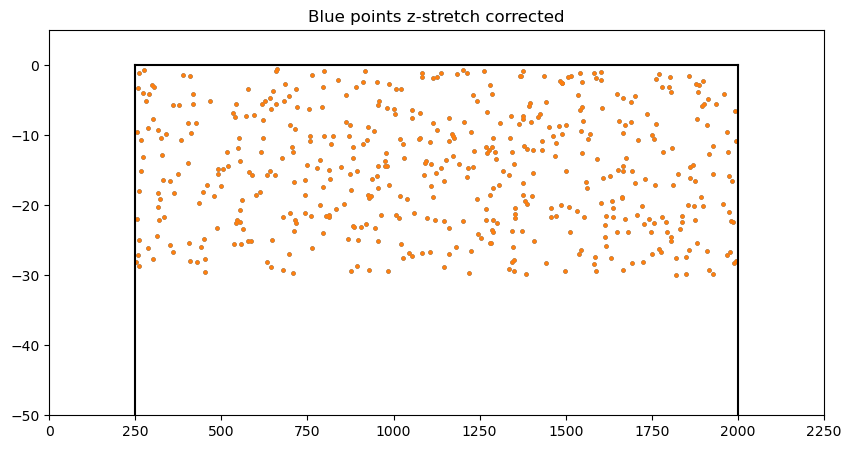

In [64]:
ss =[]
ani = anim2(dat,dat2,fps=1)
f = r"/home/jvalenti/MOAD/animations/box.gif" 
FFwriter = animation.FFMpegWriter()
ani.save(f, writer = FFwriter)

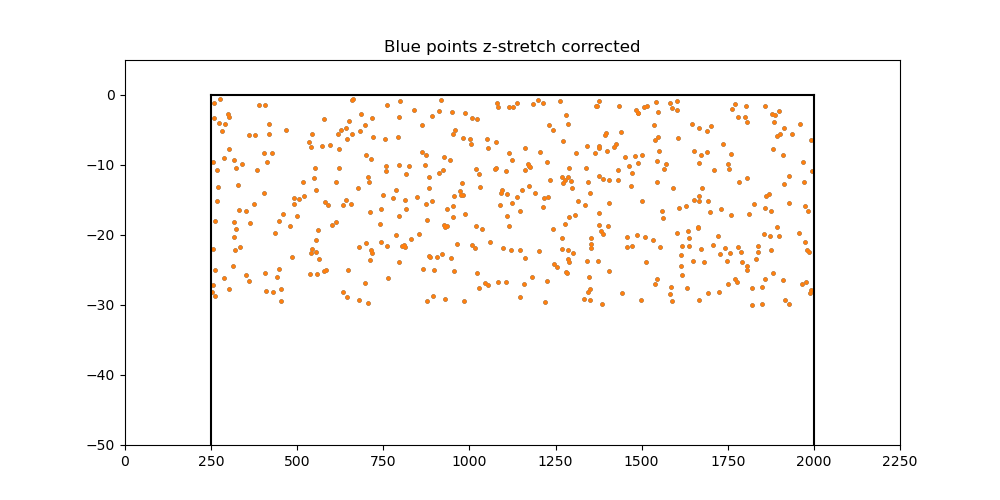

In [65]:
from IPython.display import Image
with open(f,'rb') as anim:
     display(Image(anim.read()))

In [66]:
# fig = plt.figure(figsize=(4,7))
# def update(frame):
#         fr = round(frame)
#         plt.clf()
#         ploting(fr)
# anim = animation.FuncAnimation(fig, update, frames=np.arange(0,23,1))
# f2 = r"/home/jvalenti/MOAD/animations/anim.gif" 
# FFwriter = animation.FFMpegWriter()
# anim.save(f2, writer = FFwriter)

In [67]:
# with open(f2,'rb') as anim:
#      display(Image(anim.read()))